### Packages import:

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy import *
import random
from sympy.solvers import solve

### Creating 4 variables form different ranges:

In [11]:
x1 = random.uniform(0,2)
x2 = random.uniform(2,4)
x3 = random.uniform(4,6)
x4 = random.uniform(6,8)

### Looking for function's equation on the base of its roots:

In [12]:
x = symbols('x')
y_eq = (x - x1)*(x-x2)*(x-x3)*(x-x4)

###  Wyświetlam wzór funkcji (tak dla siebie)

In [13]:
print(type(y_eq))
print(y_eq.expand())

<class 'sympy.core.mul.Mul'>
x**4 - 16.3851128352326*x**3 + 91.0965077393272*x**2 - 188.488621131432*x + 92.3710815813101


### Creating table of roots:

In [14]:
roots_table = [x1, x2, x3, x4]
round_roots_table = [round(root,5) for root in roots_table]

### Solving the equation with the derivative and determine the monotonic ranges:

In [17]:
dy_dx = sp.diff(y_eq)
equation_solver = solve(dy_dx, x)

intervals = [[min(roots_table),equation_solver[0]], [equation_solver[0], equation_solver[1]], [equation_solver[1], equation_solver[2]], [equation_solver[2], max(roots_table)]]

### Creating a function to check whether the function in a given range increases or decreases:

In [18]:
def is_positive(given_number):
    if dy_dx.subs(x, given_number) > 0:
        return 'positive'
    else:
        return 'negative'

### Defining what part of the graph is in which color:

In [26]:
def which_color(answer):
    if answer == 'positive':
        return '#0EF146'
    else:
        return '#F10EB9'

### Creating plot:

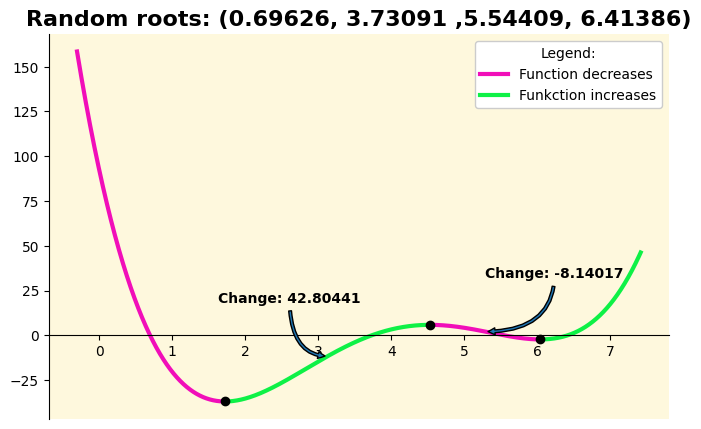

In [27]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()



x_domain = np.linspace(min(roots_table) -1, max(roots_table) +1, 1000) #function domain 

y_domain = (x_domain - x1)*(x_domain - x2)*(x_domain - x3)*(x_domain - x4) #counterdomain



dydx = np.gradient(y_domain, x_domain) #looking for extrema

dydx[1:] * dydx[:-1]<0



ekstrema_x = x_domain[1:][dydx[1:]*dydx[:-1]<0] 
ekstrema_y = y_domain[1:][dydx[1:]*dydx[:-1]<0] 



number1 = complex(equation_solver[0] - 0.1).real           
x_domain1 = np.linspace(roots_table[0] - 1, ekstrema_x[0], 1000)
y_domain1 = (x_domain1 - x1)*(x_domain1 - x2)*(x_domain1 - x3)*(x_domain1 - x4)
ax.plot(x_domain1, y_domain1, color = which_color(is_positive(number1)), zorder = 2,  linewidth=3)

number2 = complex(equation_solver[1] - 0.1).real           
x_domain2 = np.linspace(ekstrema_x[0], ekstrema_x[1], 1000)
y_domain2 = (x_domain2 - x1)*(x_domain2 - x2)*(x_domain2 - x3)*(x_domain2 - x4)
ax.plot(x_domain2, y_domain2, color = which_color(is_positive(number2)), zorder = 2,  linewidth=3)

number3 = complex(equation_solver[2] - 0.1).real           
x_domain3 = np.linspace(ekstrema_x[1], ekstrema_x[2], 1000)
y_domain3 = (x_domain3 - x1)*(x_domain3 - x2)*(x_domain3 - x3)*(x_domain3 - x4)
ax.plot(x_domain3, y_domain3, color = which_color(is_positive(number3)), zorder = 2,  linewidth=3)

number4 = complex(equation_solver[2] + 0.1).real            
x_domain4 = np.linspace(ekstrema_x[2], roots_table[3] + 1, 1000)   
y_domain4 = (x_domain4 - x1)*(x_domain4 - x2)*(x_domain4 - x3)*(x_domain4 - x4)
ax.plot(x_domain4, y_domain4, color = which_color(is_positive(number4)), zorder = 2,  linewidth=3)


ax.scatter(ekstrema_x, ekstrema_y, 
           color = "black",
           marker = 'o',
           zorder = 3 )



ax.spines['right'].set_color('none')    
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')

ax.legend(['Function decreases', 'Funkction increases'], loc='upper right',fancybox=True, framealpha=1, title='Legend:') 

ax.set_facecolor("#FEF8DD") #bg

average1 = (ekstrema_x[0]+ekstrema_x[1])/2 
average2 = (ekstrema_x[1]+ekstrema_x[2])/2



changes = [round(ekstrema_y[1]-ekstrema_y[0],5), round(ekstrema_y[2]-ekstrema_y[1],5)] 

ax.annotate("Change: {}".format(*changes),
            xy=(average1, y_eq.subs(x,average1)), xycoords='data',
            xytext=(average1 - 1.5, y_eq.subs(x,average1)+ 30), textcoords='data',
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="angle3"),fontweight = 'bold', fontsize = 10
            )

ax.annotate("Change: {}".format(changes[1]),
            xy=(average2, y_eq.subs(x,average2)), xycoords='data',
            xytext=(average2, y_eq.subs(x,average2)+ 30), textcoords='data',
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="angle3"), fontsize = 10, fontweight = 'bold'
            )



ax.set_title('Random roots: ({}, {} ,{}, {})'.format(*round_roots_table), fontsize = 16, fontweight = 'bold') #plot title


#plt.savefig('random_roots.png')
plt.show()

